In [1]:
import pandas as pd
import numpy as np
from df_aux_functions_simagro import *


df = pd.read_csv('AllStationsTempRHRainSolRadDOYTOD.csv')
df.head()

,StationID,Date,Time,Temp,RelHum,Rain,SolarRad,doy,tod
0,1,2020-10-01,00:00,19.8,81.0,0.0,0.0,274,1
1,1,2020-10-01,0:30,19.5,82.0,0.0,0.0,274,2
2,1,2020-10-01,1:00,19.7,82.0,0.0,0.0,274,3
3,1,2020-10-01,1:30,19.8,83.0,0.0,0.0,274,4
4,1,2020-10-01,2:00,19.3,85.0,0.0,0.0,274,5


In [2]:
# Aggregation

df_aggregated = df.groupby(['StationID','Date']).agg({'Temp':'mean', 'RelHum':'mean', 'Rain':'sum', 'SolarRad':'sum', 'doy':'mean'})
df_aggregated = df_aggregated.reset_index()
df_aggregated['doy'] = df_aggregated['doy'].astype(int)
df_aggregated.head(100)

,StationID,Date,Temp,RelHum,Rain,SolarRad,doy
0,1,2020-10-01,21.625000,86.479167,17.6,7904.0,274
1,1,2020-10-02,13.041667,91.833333,14.6,2281.0,275
2,1,2020-10-03,9.902083,88.916667,16.6,2589.0,276
3,1,2020-10-04,11.883333,89.416667,0.6,3166.0,277
4,1,2020-10-05,13.687500,92.354167,0.0,2951.0,278
...,...,...,...,...,...,...,...
95,1,2021-01-04,24.395833,66.895833,0.0,14793.0,4
96,1,2021-01-05,21.045833,87.104167,30.8,4668.0,5
97,1,2021-01-06,25.364583,75.770833,0.0,13699.0,6
98,1,2021-01-07,24.758333,61.208333,0.0,14824.0,7


In [3]:
df_aggregated.shape

(9899, 7)

In [4]:
# doy aggregation
# [01/10 - 31/03] = 182 days

df_days = df_aggregated.groupby(['StationID','doy'])[['Temp','RelHum','Rain','SolarRad']].mean()
df_days = df_days.reset_index()
df_days.head(100)

,StationID,doy,Temp,RelHum,Rain,SolarRad
0,1,1,25.400694,56.916667,0.000000,16691.000000
1,1,2,22.227778,72.590278,0.200000,10802.666667
2,1,3,23.010417,66.729167,0.000000,16440.333333
3,1,4,24.172222,68.263889,0.000000,14809.000000
4,1,5,21.702083,77.534722,10.266667,11129.333333
...,...,...,...,...,...,...
95,1,279,14.378472,83.437500,6.866667,8543.333333
96,1,280,13.938194,78.923611,0.000000,11411.666667
97,1,281,15.144444,74.631944,0.200000,12377.333333
98,1,282,13.399306,71.736111,0.000000,11974.666667


In [5]:
df_days.shape

(3458, 6)

In [6]:
allColumns=['Temp', 'RelHum', 'Rain', 'SolarRad']

In [7]:
data_to_standardize = df_days[allColumns]
data_to_standardize.head()

,Temp,RelHum,Rain,SolarRad
0,25.400694,56.916667,0.000000,16691.000000
1,22.227778,72.590278,0.200000,10802.666667
2,23.010417,66.729167,0.000000,16440.333333
3,24.172222,68.263889,0.000000,14809.000000
4,21.702083,77.534722,10.266667,11129.333333


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data_to_standardize)

standardized_data = scaler.transform(data_to_standardize)

df_days_standardized = pd.DataFrame(standardized_data, columns = ['Temp', 'RelHum', 'Rain', 'SolarRad'])
df_days_standardized.head()

,Temp,RelHum,Rain,SolarRad
0,1.049775,-2.303822,-0.563242,1.731439
1,0.069176,-0.368172,-0.529406,-0.375596
2,0.311053,-1.092004,-0.563242,1.641742
3,0.670112,-0.902470,-0.563242,1.057999
4,-0.093291,0.242454,1.173656,-0.258704


In [9]:
df_days.head()

,StationID,doy,Temp,RelHum,Rain,SolarRad
0,1,1,25.400694,56.916667,0.000000,16691.000000
1,1,2,22.227778,72.590278,0.200000,10802.666667
2,1,3,23.010417,66.729167,0.000000,16440.333333
3,1,4,24.172222,68.263889,0.000000,14809.000000
4,1,5,21.702083,77.534722,10.266667,11129.333333


In [10]:
df_days_standardized.insert(loc=0, column='StationID', value=df_days['StationID'])
df_days_standardized.insert(loc=1, column='doy', value=df_days['doy'])
df_days_standardized.head()

,StationID,doy,Temp,RelHum,Rain,SolarRad
0,1,1,1.049775,-2.303822,-0.563242,1.731439
1,1,2,0.069176,-0.368172,-0.529406,-0.375596
2,1,3,0.311053,-1.092004,-0.563242,1.641742
3,1,4,0.670112,-0.902470,-0.563242,1.057999
4,1,5,-0.093291,0.242454,1.173656,-0.258704


In [11]:
df_days_standardized.shape

(3458, 6)

In [12]:
df_array = transform_dfTS_to_3Darray_DOYsorted(df_days,allColumns)
df_array.shape

(19, 182, 4)

In [13]:
df_array_std = transform_dfTS_to_3Darray_DOYsorted(df_days_standardized,allColumns)
df_array_std.shape

(19, 182, 4)

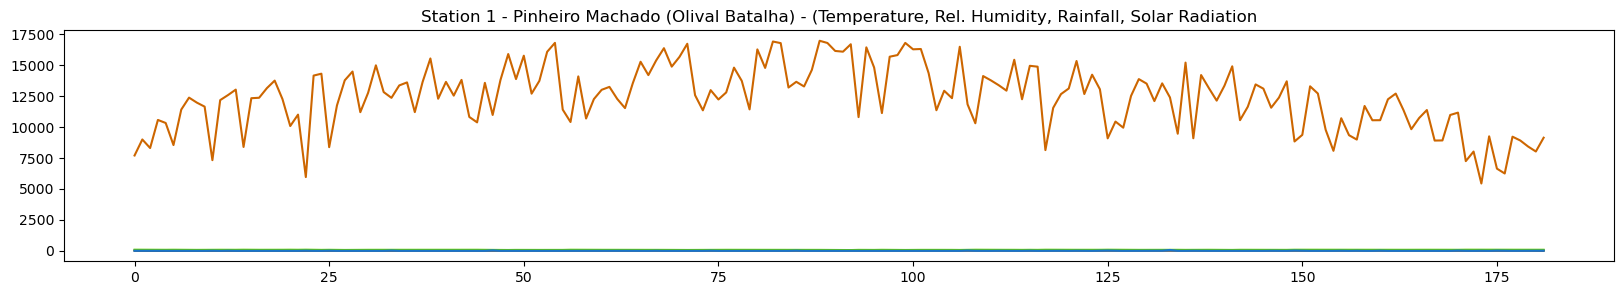

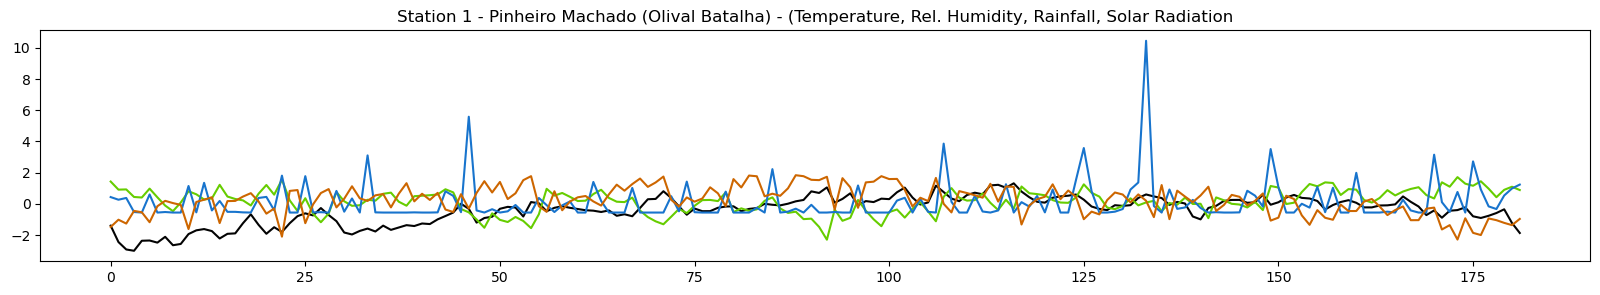

In [14]:
stations_list = df_days['StationID'].unique()
plot_first_TS(df_array, stations_list) 
plot_first_TS(df_array_std,stations_list)

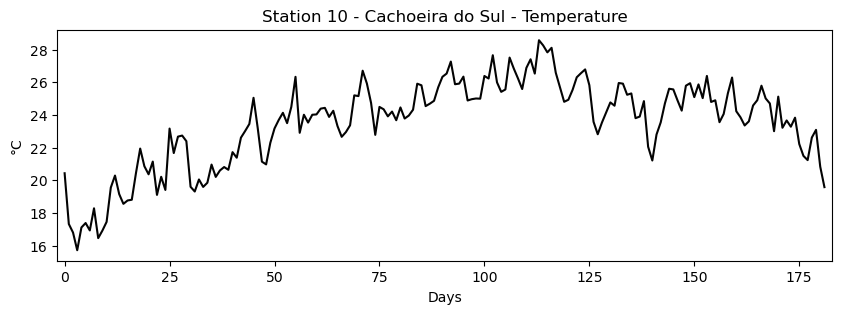

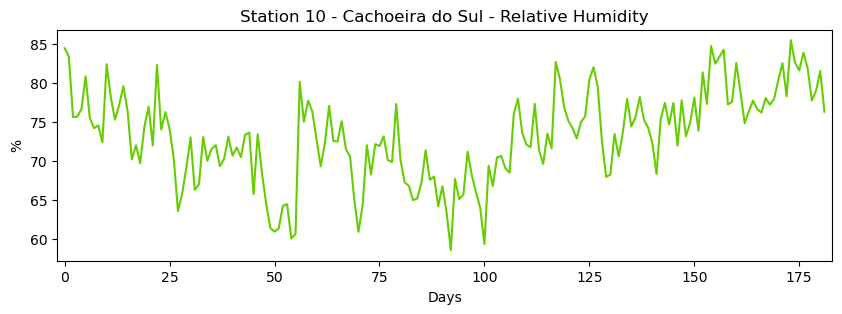

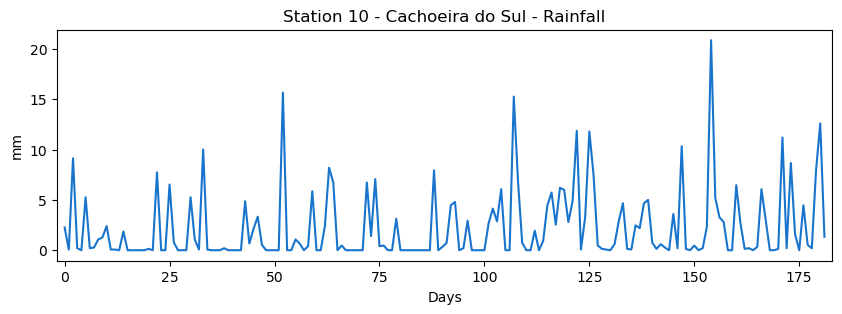

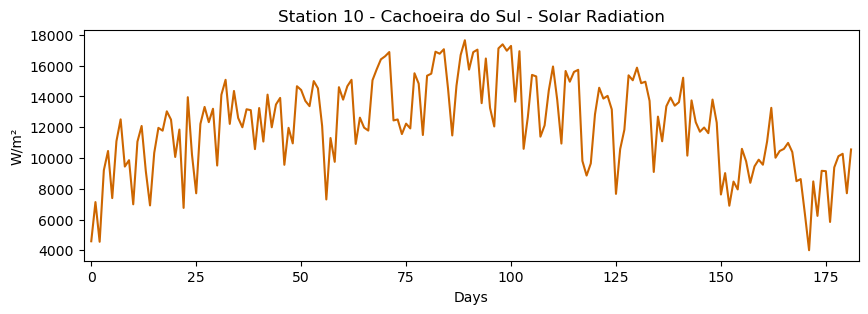

In [15]:
plot_TS_by_index_separated_variables(df_array, stations_list, 9)

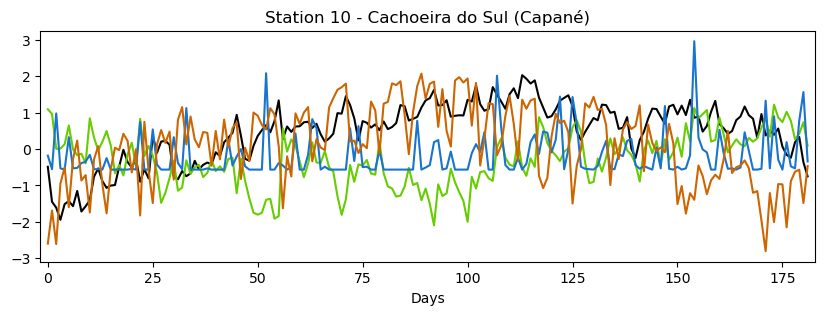

In [16]:
plot_TS_by_index(df_array_std, stations_list, 9)

In [17]:
unique_station_ids = df_days['StationID'].unique()

stations = pd.read_csv('SIMAGROStationsList.csv')
names = stations[['StationName','StationID']]
names_sort = names.sort_values(by=['StationID'])
names_sort.head()

,StationName,StationID
0,Pinheiro Machado (Olival Batalha),1
1,Piratini (Olival Olivae),2
2,São Sepé (Olival Prosperato),3
3,Itaqui (Vimaer),4
4,Maçambara (Fazenda Espinilho),5


In [18]:
flattened_df = flatten_multivariate_time_series(df_array)
flattened_df.head()

,station0_feature0,station0_feature1,station0_feature2,station0_feature3,station1_feature0,station1_feature1,station1_feature2,station1_feature3,station2_feature0,station2_feature1,...,station16_feature2,station16_feature3,station17_feature0,station17_feature1,station17_feature2,station17_feature3,station18_feature0,station18_feature1,station18_feature2,station18_feature3
0,17.463889,87.118056,5.866667,7700.666667,15.971528,93.652778,0.333333,4663.000000,19.902778,85.194444,...,6.4,6196.0,20.870833,87.520833,1.3,6323.0,16.739583,89.791667,1.2,6462.0
1,14.059722,82.909722,4.866667,8995.333333,13.028750,87.809722,1.103333,6663.000000,16.901389,82.402778,...,0.0,9098.5,19.787500,81.916667,1.0,10939.0,16.532292,82.645833,0.0,11007.0
2,12.518056,83.027778,5.533333,8304.000000,12.494801,88.459084,4.230000,7486.333333,14.727083,82.923611,...,6.7,9165.5,19.400000,78.166667,2.1,7812.5,16.178125,81.427083,2.3,10587.0
3,12.246528,79.097222,0.200000,10574.000000,12.266435,82.821296,2.276667,9620.666667,14.553472,76.187500,...,0.3,8197.0,18.061458,71.572917,0.2,12158.0,13.391667,81.322917,0.0,10291.0
4,14.328472,78.819444,0.000000,10328.000000,14.458333,80.687500,0.000000,10607.000000,16.469444,76.645833,...,0.1,13002.5,18.355208,78.437500,2.9,9177.5,15.981250,74.083333,0.0,13530.5


In [19]:
flattened_df.shape

(182, 76)

In [20]:
flattened_df_std = flatten_multivariate_time_series(df_array_std)
flattened_df_std.head()

,station0_feature0,station0_feature1,station0_feature2,station0_feature3,station1_feature0,station1_feature1,station1_feature2,station1_feature3,station2_feature0,station2_feature1,...,station16_feature2,station16_feature3,station17_feature0,station17_feature1,station17_feature2,station17_feature3,station18_feature0,station18_feature1,station18_feature2,station18_feature3
0,-1.403117,1.425970,0.429271,-1.485591,-1.864335,2.232991,-0.506849,-2.572565,-0.649371,1.188409,...,0.519499,-2.024009,-0.350191,1.475712,-0.343310,-1.978564,-1.626965,1.756154,-0.360228,-1.928825
1,-2.455183,0.906252,0.260093,-1.022317,-2.773808,1.511389,-0.376582,-1.856901,-1.576959,0.843646,...,-0.563242,-0.985401,-0.684998,0.783612,-0.394064,-0.326811,-1.691029,0.873662,-0.563242,-0.302479
2,-2.931640,0.920831,0.372878,-1.269699,-2.938827,1.591583,0.152382,-1.562286,-2.248934,0.907967,...,0.570253,-0.961426,-0.804756,0.320497,-0.207968,-1.445573,-1.800485,0.723150,-0.174132,-0.452768
3,-3.015556,0.435418,-0.529406,-0.457420,-3.009404,0.895331,-0.178079,-0.798553,-2.302589,0.076075,...,-0.512489,-1.307987,-1.218436,-0.493814,-0.529406,0.109386,-2.661648,0.710286,-0.563242,-0.558686
4,-2.372126,0.401113,-0.563242,-0.545447,-2.331992,0.631813,-0.563242,-0.445611,-1.710452,0.132678,...,-0.546324,0.411575,-1.127652,0.353944,-0.072625,-0.957132,-1.861330,-0.183784,-0.563242,0.600511


In [21]:
flattened_df_std.shape

(182, 76)

Clusters = 2  Silhouette Score: 0.420
Clusters = 3  Silhouette Score: 0.373
Clusters = 4  Silhouette Score: 0.243
Clusters = 5  Silhouette Score: 0.221
Clusters = 6  Silhouette Score: 0.227
Clusters = 7  Silhouette Score: 0.150
Clusters = 8  Silhouette Score: 0.201
Clusters = 9  Silhouette Score: 0.197
Clusters = 10  Silhouette Score: 0.218


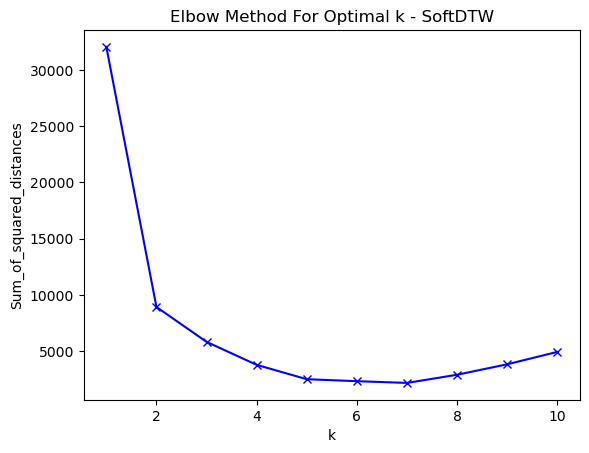

In [22]:
# K-MEANS

# Silhouette Score and Elbow Plot
sil_and_elbow_scores_TSKMeans(df_array_std,11,"softdtw",10,50)

In [23]:
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,2,"softdtw",10,50)
y_pred_Kmeans_std

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

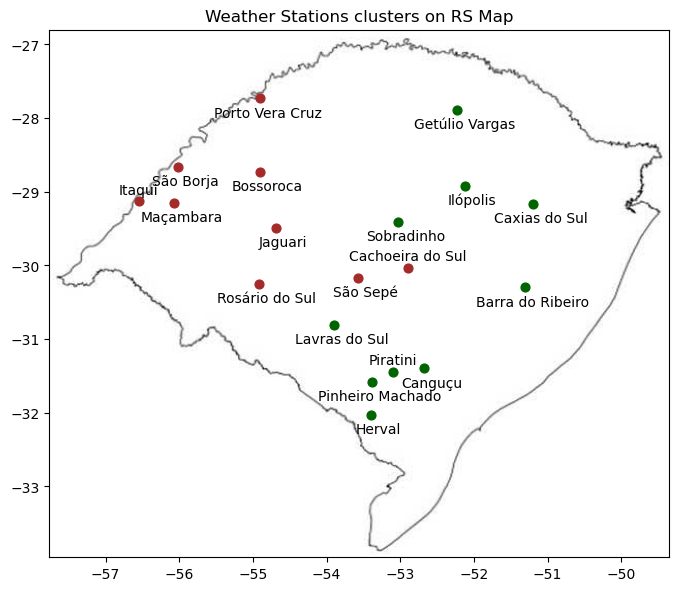

In [24]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std)

In [25]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)

Cluster 0
RMSE for station 0: 0.4341069686519962
RMSE for station 1: 0.36770101103470254
RMSE for station 2: 0.6840370414149607
RMSE for station 3: 0.4918365668341324
RMSE for station 4: 0.6939928890897651
RMSE for station 5: 0.43085375863099934
RMSE for station 6: 0.43068554463128494
RMSE for station 7: 0.5213282419179186
RMSE for station 8: 0.5562313288634092
RMSE for station 9: 0.48114237603516113
RMSE for Cluster 0: 0.509191572710433
Cluster 1
RMSE for station 0: 0.42449399778799946
RMSE for station 1: 0.36089563898492416
RMSE for station 2: 0.3787286685470833
RMSE for station 3: 0.4932365691716291
RMSE for station 4: 0.36415188583838454
RMSE for station 5: 0.5933615879203508
RMSE for station 6: 0.6439765087055419
RMSE for station 7: 0.566121136082174
RMSE for station 8: 0.954555636980026
RMSE for Cluster 1: 0.5310579588909015
Average Cluster RMSE: 0.5201247658006672


Clusters = 2  Silhouette Score: 0.231
Clusters = 3  Silhouette Score: 0.130
Clusters = 4  Silhouette Score: 0.147
Clusters = 5  Silhouette Score: 0.073
Clusters = 6  Silhouette Score: 0.044
Clusters = 7  Silhouette Score: 0.043
Clusters = 8  Silhouette Score: 0.065
Clusters = 9  Silhouette Score: 0.035
Clusters = 10  Silhouette Score: 0.022


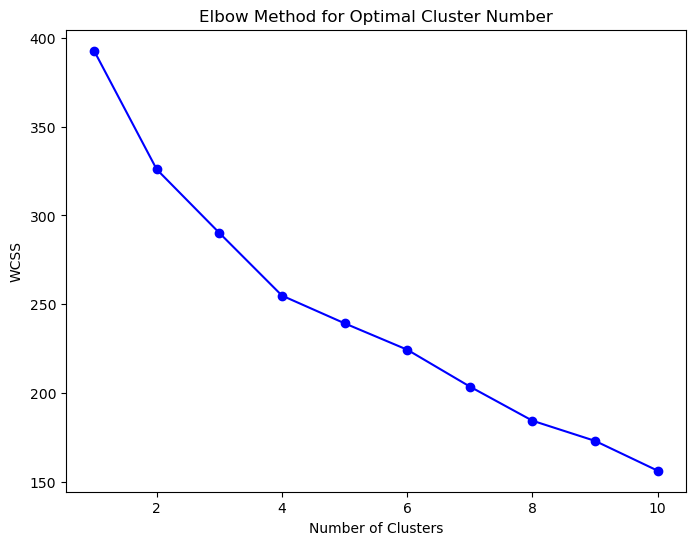

In [27]:
# K-MEDOIDS
sil_and_elbow_scores_TSKMedoids(df_array_std, 11, 300)

In [28]:
y_pred_Kmedoids_std, cluster_medoids_std = cluster_labels_TSKMedoids(df_array_std, 2, 300)
y_pred_Kmedoids_std

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

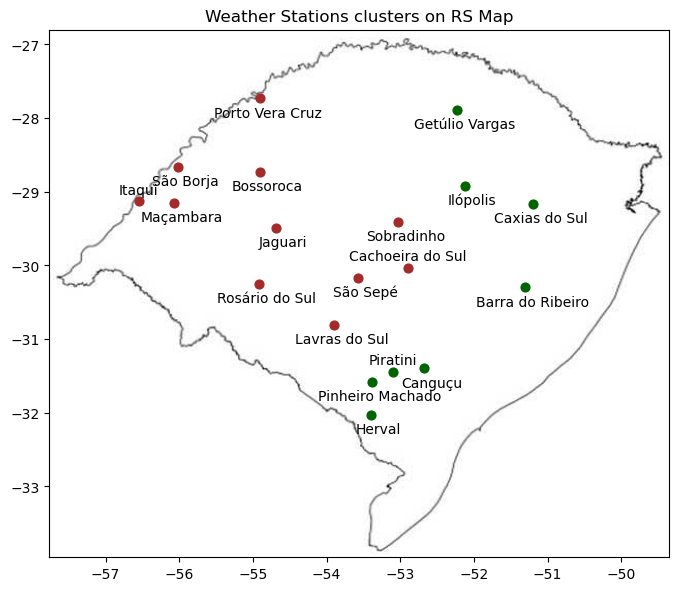

In [29]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmedoids_std)

In [30]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmedoids_std)

Cluster 0
RMSE for station 0: 0.39846366789201404
RMSE for station 1: 0.369210806711225
RMSE for station 2: 0.6207191383976612
RMSE for station 3: 0.5124674390939329
RMSE for station 4: 0.629894432870876
RMSE for station 5: 0.40844191645451716
RMSE for station 6: 0.40201482482901324
RMSE for station 7: 0.5691869728404009
RMSE for Cluster 0: 0.4887998998862051
Cluster 1
RMSE for station 0: 0.40522573849227306
RMSE for station 1: 0.37152261365486
RMSE for station 2: 0.39421819559944976
RMSE for station 3: 0.4755218349638143
RMSE for station 4: 0.3758102432019508
RMSE for station 5: 0.4127116115005454
RMSE for station 6: 0.6141685296124534
RMSE for station 7: 0.6403483736076577
RMSE for station 8: 0.5573995551931237
RMSE for station 9: 0.9538230986568269
RMSE for station 10: 0.4007191468938898
RMSE for Cluster 1: 0.5092244492160767
Average Cluster RMSE: 0.4990121745511409


In [31]:
# Hierarchical Clustering

list_names_dendogram = []
for index, row in names_sort.iterrows():
    stID = row['StationID']
    if stID in unique_station_ids:
        list_names_dendogram.append(row['StationName'].rsplit(' (')[0])
        
list_names_dendogram

['Pinheiro Machado',
 'Piratini',
 'São Sepé',
 'Itaqui',
 'Maçambara',
 'Rosário do Sul',
 'Getúlio Vargas',
 'Ilópolis',
 'Barra do Ribeiro',
 'Cachoeira do Sul',
 'Canguçu',
 'Herval',
 'Lavras do Sul',
 'São Borja',
 'Bossoroca',
 'Jaguari',
 'Caxias do Sul',
 'Porto Vera Cruz',
 'Sobradinho']

In [32]:
sil_score_TSHierarcClustering(df_array_std)

Clusters = 2  Silhouette Score: 0.217
Clusters = 3  Silhouette Score: 0.130
Clusters = 4  Silhouette Score: 0.133
Clusters = 5  Silhouette Score: 0.127
Clusters = 6  Silhouette Score: 0.131
Clusters = 7  Silhouette Score: 0.136
Clusters = 8  Silhouette Score: 0.126
Clusters = 9  Silhouette Score: 0.124
Clusters = 10  Silhouette Score: 0.125
Clusters = 11  Silhouette Score: 0.121
Clusters = 12  Silhouette Score: 0.115
Clusters = 13  Silhouette Score: 0.099
Clusters = 14  Silhouette Score: 0.088
Clusters = 15  Silhouette Score: 0.079
Clusters = 16  Silhouette Score: 0.066
Clusters = 17  Silhouette Score: 0.047
Clusters = 18  Silhouette Score: 0.047


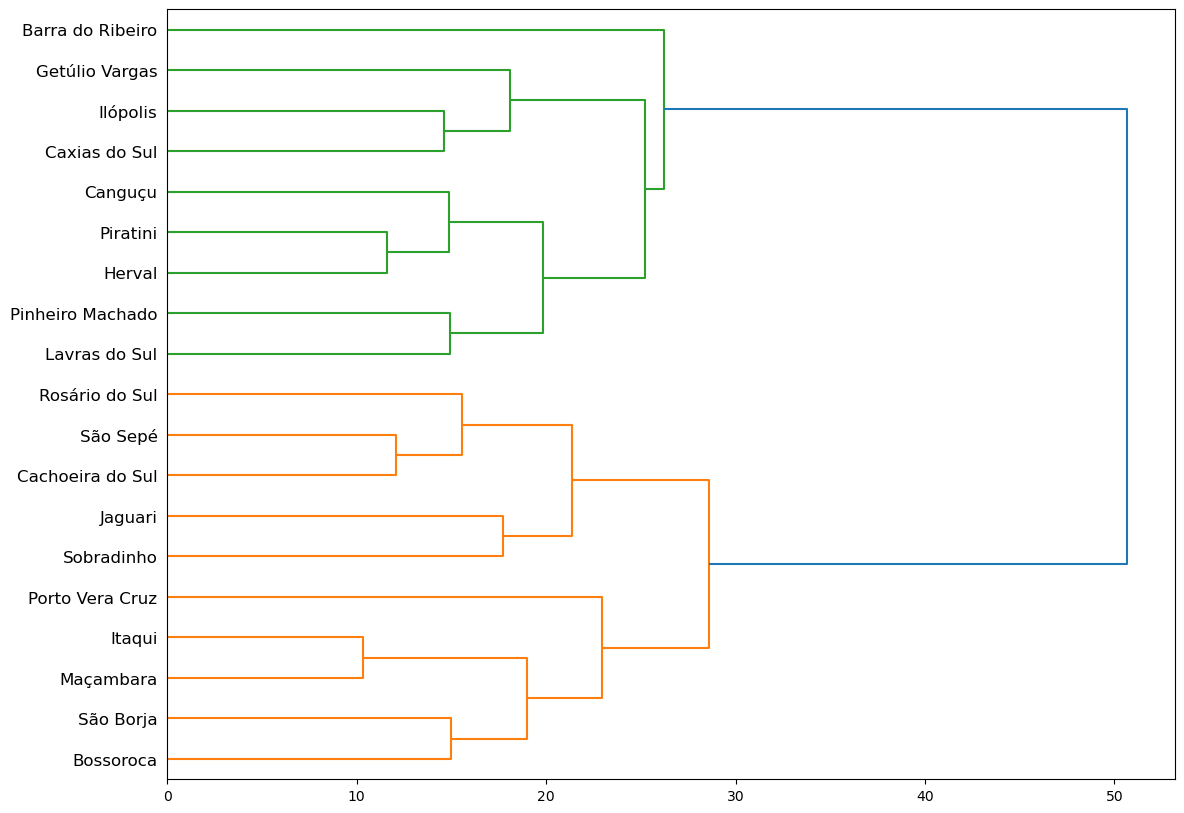

In [33]:
n_clusters=2
h_cluster_labels_std, h_linkage_matrix_std = dendogram_TSHierarcClustering(df_array_std, n_clusters, list_names_dendogram)

In [34]:
list_index_dendogram_std = leaves_list(h_linkage_matrix_std)
list_index_dendogram_std

array([ 8,  6,  7, 16, 10,  1, 11,  0, 12,  5,  2,  9, 15, 18, 17,  3,  4,
       13, 14], dtype=int32)

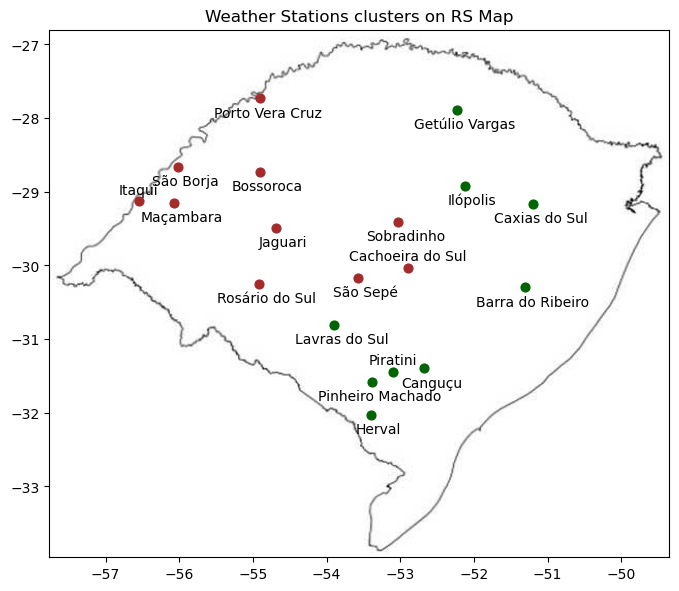

In [35]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,h_cluster_labels_std)

In [36]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, h_cluster_labels_std)

Cluster 1
RMSE for station 0: 0.4115212668524996
RMSE for station 1: 0.369990924925195
RMSE for station 2: 0.651718726759587
RMSE for station 3: 0.5293455987192234
RMSE for station 4: 0.6835881223075503
RMSE for station 5: 0.4106615386546174
RMSE for station 6: 0.42840869280262234
RMSE for station 7: 0.5085188921171887
RMSE for station 8: 0.5665975304077795
RMSE for Cluster 1: 0.5067056992829182
Cluster 2
RMSE for station 0: 0.4163940812570402
RMSE for station 1: 0.36015447112945925
RMSE for station 2: 0.3808737790560182
RMSE for station 3: 0.5046036045478983
RMSE for station 4: 0.3663902694919042
RMSE for station 5: 0.6009039659314518
RMSE for station 6: 0.6310103897375422
RMSE for station 7: 0.5571213969230966
RMSE for station 8: 0.9465034872569414
RMSE for station 9: 0.400318831952829
RMSE for Cluster 2: 0.5164274277284181
Average Cluster RMSE: 0.5115665635056681
